Resources used: 
https://kalaharijournals.com/resources/SP-Vol.6_53.pdf
https://iopscience.iop.org/article/10.1088/1742-6596/1246/1/012030/pdf

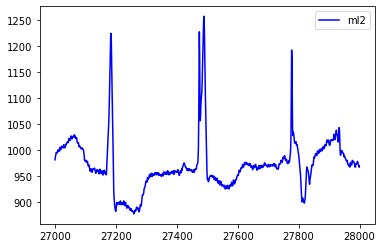

In [50]:
import tensorflow as tf
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfilt, sosfreqz, cheby1

def takeData(fileName):
    with open(fileName) as csv_file:
      list1 = []
      list2 = []
      reader = csv.reader(csv_file, delimiter=',')
      flag = True
      for row in reader:
        if flag:
          flag = False
          continue
        list1.append(row[1])
        list2.append(row[2])
        
    return np.array([list1, list2]).astype(float)

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        x = sosfilt(sos, data[0])
        y = sosfilt(sos, data[1])
        return np.array([x,y])
    
def cheby1_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = cheby1(order, 1, [low, high], analog=False, btype='band', output='sos')
        return sos

def cheby1_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = cheby1_bandpass(lowcut, highcut, fs, order=order)
        x = sosfilt(sos, data[0])
        y = sosfilt(sos, data[1])
        return np.array([x,y])

    
def plot_heart_beats(filtered, start=0, end=3600, ml2_or_v5 = "both"):
    if (ml2_or_v5 == "ml2"):
        plt.plot(range(start,end), filtered[0][start:end], color="blue")
        plt.legend(['ml2'])
    elif (ml2_or_v5 == "v5"):
        plt.plot(range(start,end), filtered[1][start:end], color="orange")
        plt.legend(['v5'])
    else:
        plt.plot(range(start,end), filtered[0][start:end], color="blue")
        plt.plot(range(start,end), filtered[1][start:end], color="orange")
        plt.legend(['MLII', 'V5'])

def normalise_y_axis(data, start=2100):
    min1 = np.amin(data[0][start:])
    max1 = np.amax(data[0][start:])
    diff1 = max1 - min1
    print(diff1)
    
    min2 = np.amin(data[1][start:])
    max2 = np.max(data[1][start:])
    diff2 = max2 - min2
    print(diff2)
    for i in range(start, len(data[0])):
        data[0][i] = (data[0][i] - min1)/(diff1)
        data[1][i] = (data[1][i] - min2)/(diff2)
        
    return data
        
        
    

data = takeData('ecgData/104.csv')


filtered = butter_bandpass_filter(data, 0.4, 45, 360)

filtered1 = cheby1_bandpass_filter(data, 0.4, 45, 360)

#data = normalise_y_axis(data)



plot_heart_beats(data, 27000, 28000, "ml2")

    

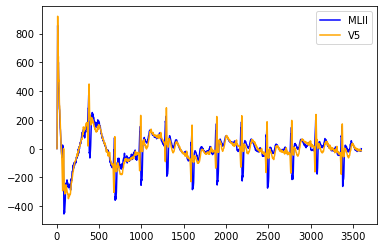

In [12]:
plot_heart_beats(filtered1, 0, 3600)


Step 1: Import the data into some kind of structure (likely numpy)
Step 2: Pass through a frequency band-pass filter to cancel power line oscillations and slow drifts, "butterworth filter" - cutoff 0.4Hz and 45Hz.
Step 3: Deal with missing values